In [1]:
pip install fbprophet

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### For real time data

In [3]:
import pandas as pd
from fbprophet import Prophet

df = pd.read_csv('/content/drive/My Drive/DS_Project7/ABM_data_prophet.csv')
df.head()

,ds,y
0,2020-01-22,2
1,2020-01-23,2
2,2020-01-24,2
3,2020-01-25,3
4,2020-01-26,3


In [4]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
165,2020-07-05
166,2020-07-06
167,2020-07-07
168,2020-07-08
169,2020-07-09


In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
165,2020-07-05,134.246884,102.781594,166.609162
166,2020-07-06,134.813977,102.897653,167.842047
167,2020-07-07,135.556050,102.946033,169.127447
168,2020-07-08,136.207364,103.119111,170.543928
169,2020-07-09,136.850244,102.894277,171.923920


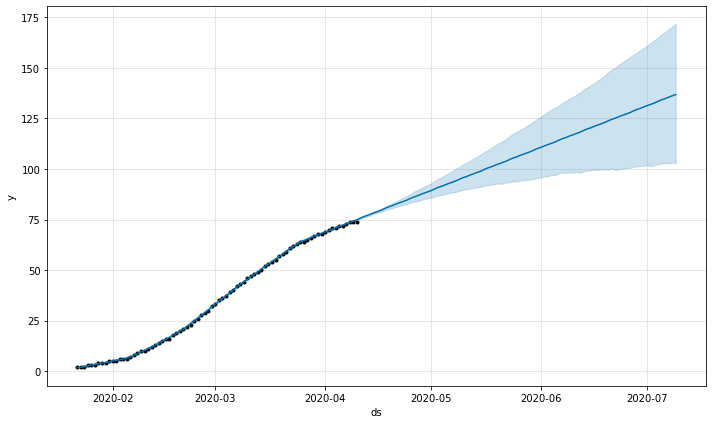

In [7]:
fig1 = m.plot(forecast)

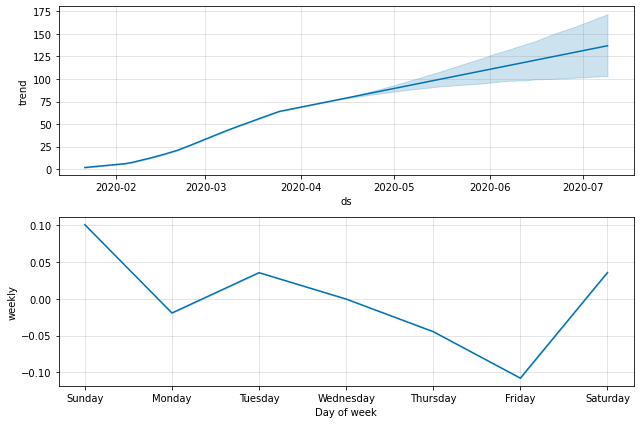

In [8]:
fig2 = m.plot_components(forecast)

In [9]:
#Configuring plotly
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML("""
    <script src="/static/components/requirejs/require.js"></script>
    <script> 
      requirejs.config({
          paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
          },
      });
      </script>
      """))
  
from fbprophet.plot import plot_plotly
import plotly.offline as py

configure_plotly_browser_state()

In [10]:
fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

In [11]:
#Setting a cap totalling to ABM's population previously used
df['cap'] = 80

#Logistic fitting
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


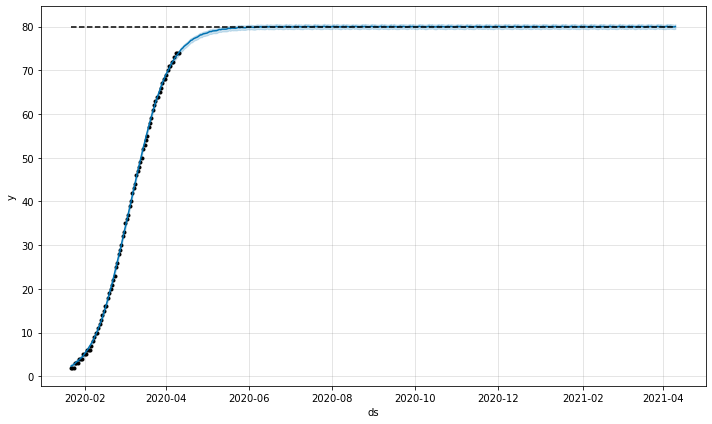

In [12]:
future = m.make_future_dataframe(periods=365)
future['cap'] = 80
fcst = m.predict(future)
fig = m.plot(fcst)

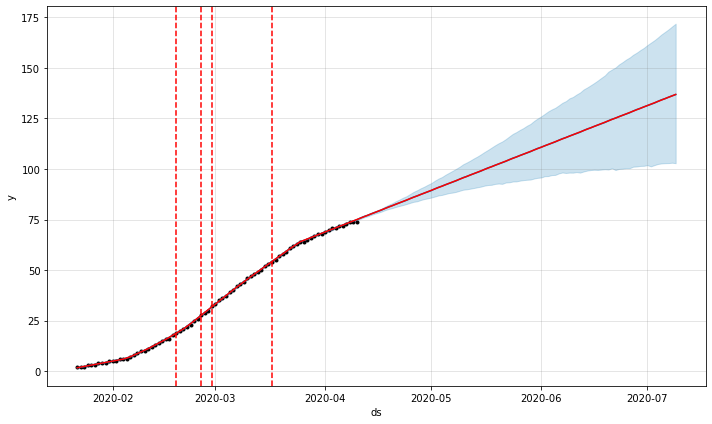

In [13]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

##Seasonality

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


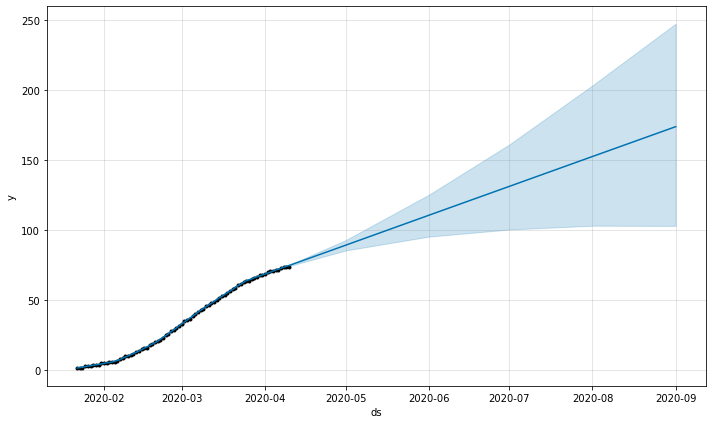

In [14]:
df1 = pd.read_csv('/content/drive/My Drive/DS_Project7/ABM_data_prophet.csv')
m1 = Prophet()
m1.fit(df1)
future1 = m1.make_future_dataframe(5, freq='MS')
forecast1 = m1.predict(future1)
fig1 = m1.plot(forecast1)

###Uncertainity in seasonality

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


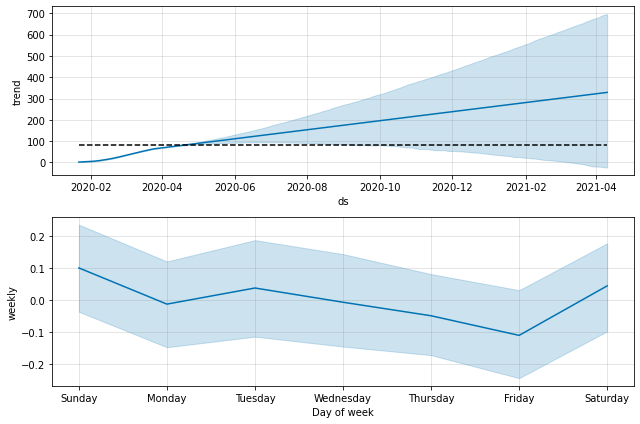

In [15]:
m2 = Prophet(mcmc_samples=300)
forecast2 = m2.fit(df).predict(future)
fig = m2.plot_components(forecast2)

In [16]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial = '59 days', period='180 days', horizon = '20 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-03-21 00:00:00 and 2020-03-21 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-22,59.895345,59.477683,60.332370,61,2020-03-21
1,2020-03-23,60.804137,60.349360,61.246242,62,2020-03-21
2,2020-03-24,61.906930,61.474726,62.356096,63,2020-03-21
3,2020-03-25,62.704132,62.269525,63.147848,64,2020-03-21
4,2020-03-26,63.677471,63.219025,64.078275,64,2020-03-21


In [17]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,2 days,1.325175,1.151163,1.150259,0.018699,0.018699,0.0
1,3 days,1.312446,1.145620,1.144467,0.018319,0.018319,0.0
2,4 days,1.437038,1.198765,1.194469,0.018799,0.018799,0.0
3,5 days,0.891649,0.944272,0.809199,0.012644,0.012644,0.5
4,6 days,0.180789,0.425193,0.415013,0.006424,0.006424,0.5


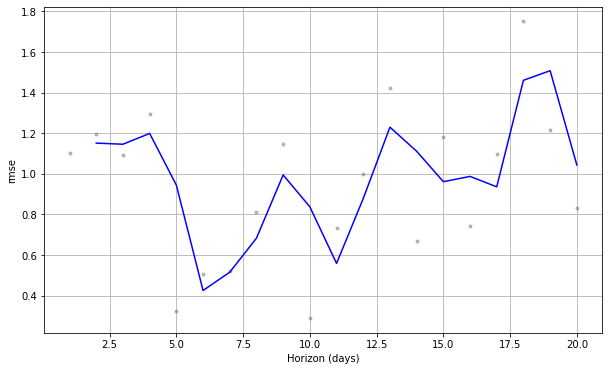

In [18]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')